In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"G:\datasets\Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Exited'>

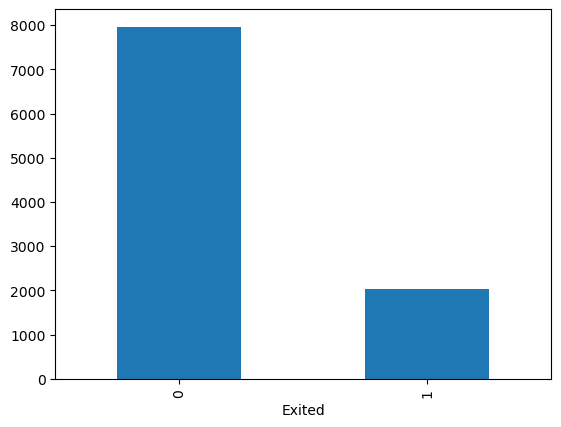

In [5]:
df['Exited'].value_counts().plot(kind='bar')

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
s=SMOTE()

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
d=df['Geography'].value_counts()

In [15]:
type(d)

pandas.core.series.Series

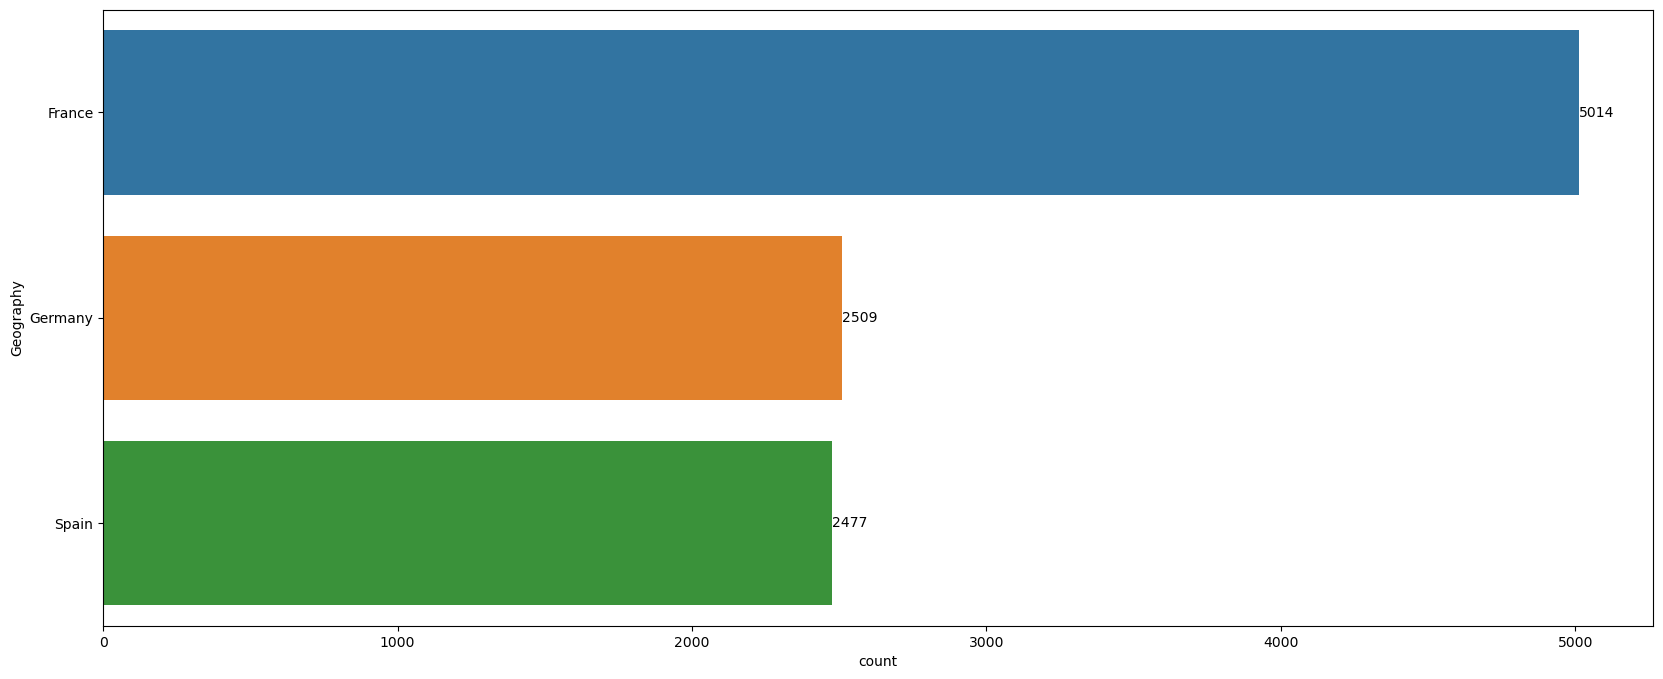

In [16]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x=d,y=d.index)
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
df2=df

In [20]:
df=pd.get_dummies(df,dtype=int)

In [21]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<Axes: >

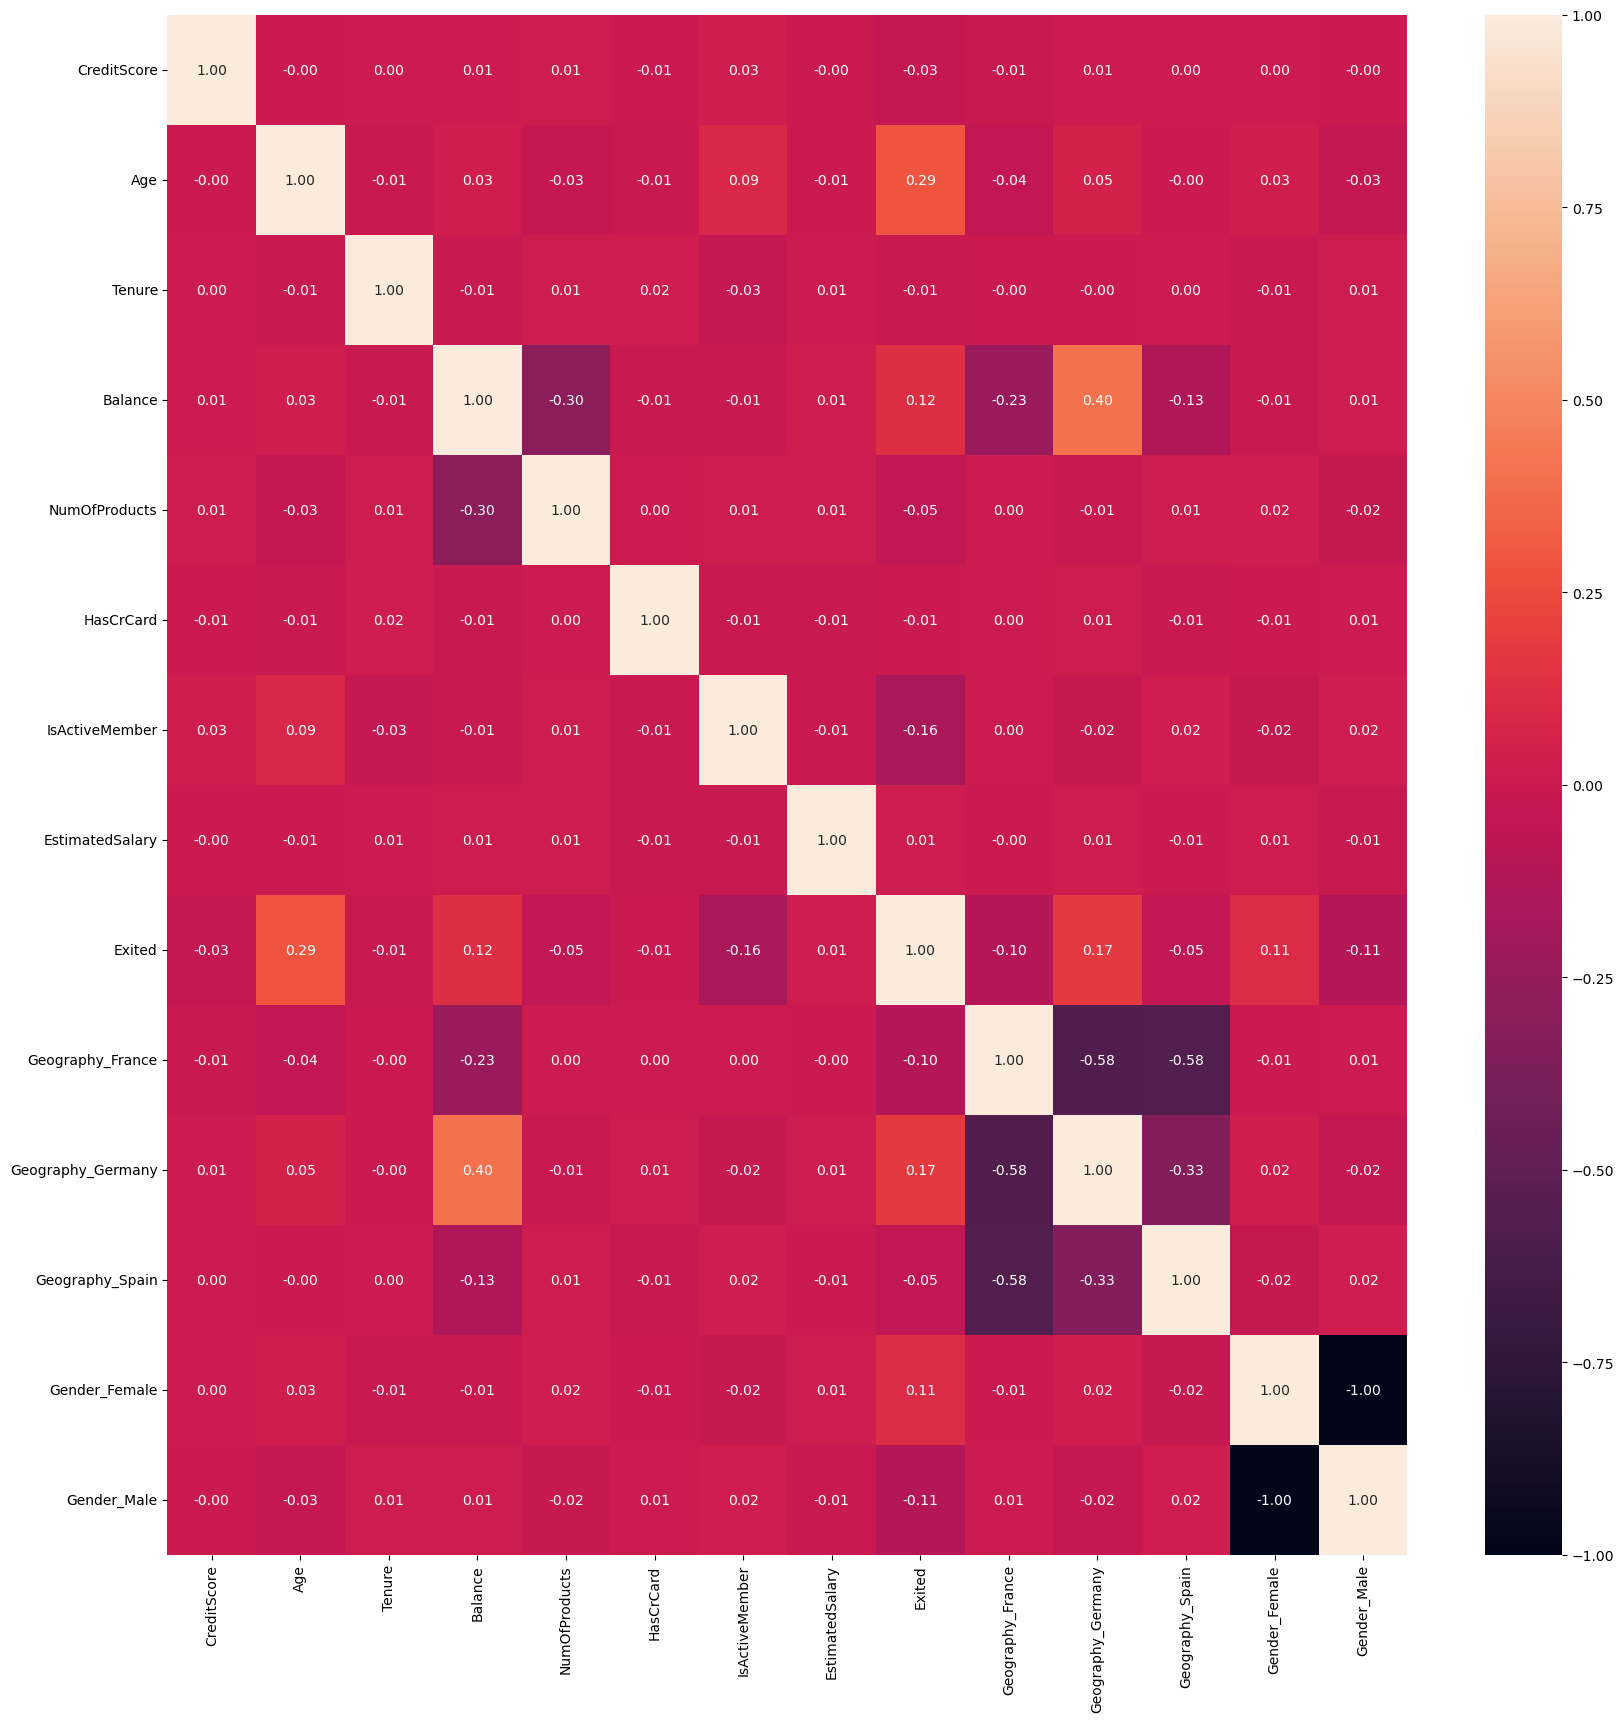

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [24]:
X=df.drop(columns='Exited')

In [25]:
y=df['Exited']

In [26]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [27]:
s=SMOTE(sampling_strategy='auto')

In [28]:
X_res,y_res=s.fit_resample(X,y)

In [29]:
X_res.shape

(15926, 13)

In [30]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(12740, 13)

In [34]:
X_test.shape

(3186, 13)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc=StandardScaler()

In [37]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [38]:
X_train_scaled

array([[-0.15438916,  0.30254124, -0.29944422, ..., -0.46500443,
        -0.81249687,  1.1788959 ],
       [ 1.1013041 ,  0.10116322, -1.4057524 , ..., -0.46500443,
        -0.81249687,  1.1788959 ],
       [-0.42736596,  1.30943138,  0.06932517, ..., -0.46500443,
         1.23077398, -0.84825132],
       ...,
       [ 0.20594021,  0.20185223,  1.17563335, ..., -0.46500443,
        -0.81249687,  1.1788959 ],
       [-0.07795566,  0.80598631, -0.29944422, ..., -0.46500443,
         1.23077398, -0.84825132],
       [ 0.53351236,  1.00736434, -1.4057524 , ..., -0.46500443,
        -0.81249687,  1.1788959 ]])

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [56]:
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100

399/399 [==============================] - 2s 1ms/step - loss: 0.6074
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5057
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4471
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4133
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.3933
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.3804
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.3709
Epoch 8/100
399/399 [==============================] - 1s 1ms/step - loss: 0.3635
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.3573
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.3522
Epoch 11/100
399/399 [==============================] - 1s 2ms/step - loss: 0.3478
Epoch 12/100
399/399 [==============================] - 1s 2ms/step - loss: 0.3441
Epoch 13/100

In [58]:
model.layers[1].get_weights()

[array([[-2.7087245],
        [ 8.44287  ],
        [-3.4817076]], dtype=float32),
 array([1.4409473], dtype=float32)]

In [60]:
model.layers[0].get_weights()

[array([[-1.76783741e-01, -8.63344446e-02,  8.93138424e-02],
        [-7.09397078e-04,  3.81976187e-01, -9.75856841e-01],
        [ 1.06039263e-01, -4.58370298e-02,  9.02230442e-02],
        [ 2.81436658e+00,  3.37544352e-01, -5.27764261e-01],
        [ 3.37063551e+00,  1.08535528e+00,  2.87806535e+00],
        [-6.57968223e-03, -1.10528775e-01,  2.16829062e-01],
        [ 4.80303138e-01, -4.93276685e-01,  3.32512200e-01],
        [-6.26120716e-02,  1.19618038e-02,  5.19353338e-02],
        [ 2.30187035e+00, -1.67364919e+00,  1.48731327e+00],
        [-1.12562962e-01, -1.50969541e+00,  1.56033230e+00],
        [ 1.63744938e+00, -1.33472824e+00,  1.28728175e+00],
        [ 1.48070931e+00, -1.58886015e+00,  1.51392055e+00],
        [ 1.46780789e+00, -1.79143274e+00,  1.72813928e+00]], dtype=float32),
 array([ 0.89783764, -0.5301373 ,  0.12101071], dtype=float32)]

In [62]:
y_prob=model.predict(X_test_scaled)

100/100 [==============================] - 0s 1ms/step


In [63]:
y_pred=np.where(y_prob>0.6,1,0)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
a=accuracy_score(y_test,y_pred)

In [67]:
a

0.8703703703703703

In [68]:
model2=Sequential()
model2.add(Dense(5,activation='relu',input_dim=13))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 70        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [73]:
history=model2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100

319/319 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.8832 - val_loss: 0.2795 - val_accuracy: 0.8677
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.8841 - val_loss: 0.2799 - val_accuracy: 0.8685
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.2701 - accuracy: 0.8852 - val_loss: 0.2793 - val_accuracy: 0.8681
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.8838 - val_loss: 0.2801 - val_accuracy: 0.8634
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.2702 - accuracy: 0.8838 - val_loss: 0.2809 - val_accuracy: 0.8666
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.8849 - val_loss: 0.2814 - val_accuracy: 0.8677
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.8842 - val_loss: 0.2821 - val_accuracy: 0.868

In [78]:
y_prob2=model2.predict(X_test_scaled)

100/100 [==============================] - 0s 1ms/step


In [79]:
y_pre2=np.where(y_prob2>0.6,1,0)

In [81]:
accuracy_score(y_test,y_pre2)

0.891713747645951

fatal: not a git repository (or any of the parent directories): .git
